# Análisis de las acciones de los usuarios con las tarjetas

#### Hecho por David Gavilanes de Dios

#### Primero importamos las librerías necesarias

In [4]:
import pandas as pd
import json
from collections import defaultdict
import re
import numpy as np

#### Con este bucle obtenemos los datos necesarios de cada traza

In [127]:
#def porDefecto():
    #return defaultdict(lambda: {"tarjetasCreadas" : 0})

def extraerDatosTarjetas(rawData):
    erGameObject = re.compile(r'\bgame-object$\b')
    erInteracted = re.compile(r'\binteracted$\b')
    erCompleted = re.compile(r'\bcompleted$\b')
    erInitialized = re.compile(r'\binitialized$\b')
    erLevel = re.compile(r'\blevel$\b')
    erIdLevel = re.compile(r'/')
    erTutorial = re.compile(r'\btutorial\b')
    
    dataCreadas = defaultdict(defaultdict)
    dataMovidas = defaultdict(defaultdict)
    dataEliminadas = defaultdict(defaultdict)
    dataAttach = defaultdict(defaultdict)
    dataDettach = defaultdict(defaultdict)
    dataDuplicate = defaultdict(defaultdict)
    dataDeclare = defaultdict(defaultdict)

    nivel = defaultdict()

    #Para cada traza...
    for evento in rawData:
        
        #print(evento)
        #Guardamos el verbo y el objeto de la traza
        verb = evento["verb"]["id"]
        obj = evento["object"]["definition"]["type"]
        levelCode = 0

        #Empezamos nivel y lo guardamos para luego mirar si es el editor level
        if erLevel.search(obj) and erInitialized.search(verb):
            if "result" in evento:
                name = evento["actor"]["name"]
                levelCode = erIdLevel.split(evento["object"]["id"])[-1]
                nivel[name] = levelCode

        #Si el objeto de la acción es un objecto
        elif erGameObject.search(obj) :
            name = evento["actor"]["name"]

            #Si el verbo es interacted...
            if erInteracted.search(verb):
                    
                    #Con try-catch evitamos errores de si una traza tiene el verbo y objeto que buscamos pero no es la traza propia que queremos analizar, ya que hay muchas con el mismo verbo y objeto
                    try:
                        #Descartamos el editor level
                        if not "editor_level"  in nivel[name]:
                            #Descartamos niveles de tutorials
                            if not "tutorial" in nivel[name]:
                            
                                #Guardamos la accion y cada una se guarda en un diccionario
                                accion = evento["result"]["extensions"]["action"]
                                levelCode = nivel[name]

                                if accion == "create":
                                    if levelCode not in dataCreadas[name]:
                                        dataCreadas[name][levelCode] = 1
                                        if(evento["actor"]["name"] == "gqoj"):
                                            print(nivel[name])
                                            print(evento)
                                    else:
                                        dataCreadas[name][levelCode] += 1
                                        

                                elif accion == "move":
                                    if levelCode not in dataMovidas[name]:
                                        dataMovidas[name][levelCode] = 1  
                                    else:
                                        dataMovidas[name][levelCode] += 1

                                elif accion == "remove":
                                    if levelCode not in dataEliminadas[name]:
                                        dataEliminadas[name][levelCode ] = 1
                                    else:
                                        dataEliminadas[name][levelCode] += 1

                                elif accion == "attach" or accion == "attach_to_input" or accion == "attach_to_bottom" or accion == "attach_to_top":
                                    if levelCode not in dataAttach[name]:
                                        dataAttach[name][levelCode] = 1 
                                    else:
                                        dataAttach[name][levelCode] += 1
                                
                                elif accion == "dettach":
                                    if levelCode not in dataDettach[name]:
                                        dataDettach[name][levelCode] = 1
                                    else:
                                        dataDettach[name][levelCode] += 1

                                elif accion == "duplicate":
                                    if levelCode not in dataDuplicate[name]:
                                        dataDuplicate[name][levelCode] = 1
                                    else:
                                        dataDuplicate[name][levelCode] += 1
                        
                                elif accion == "declare":
                                    if levelCode not in dataDeclare[name]:
                                        dataDeclare[name][levelCode] = 1
                                    else:
                                        dataDeclare[name][levelCode] += 1

                    except KeyError:
                        pass               

    return dataCreadas, dataMovidas, dataEliminadas, dataAttach, dataDettach, dataDuplicate, dataDeclare 

In [128]:
#Al haber guardado en cada diccionario cada tipo de accion y el numero de veces que aparece, ahora hacemos la media de cada accion en cada nivel y para cada bloque
def mediaTarjetas(data):
    mediaTarjeta = defaultdict()
    numero = defaultdict()
    listaValores = defaultdict()

    for name in data:
        for level in data[name]:
                if level in mediaTarjeta:
                    mediaTarjeta[level] += data[name][level]
                    numero[level] += 1
                    listaValores[level].append(data[name][level])
                else:
                    mediaTarjeta[level] = data[name][level]
                    numero[level] = 1
                    listaValores[level] = [data[name][level]]

    for level in mediaTarjeta:
            mediaTarjeta[level] = mediaTarjeta[level] / numero[level]
    
    print(mediaTarjeta)
    return mediaTarjeta, listaValores
            
            

                

In [129]:
#Aqui mostramos los datos y abrimos los json
JSONFile = open('./Back/data/traces_Articoding_Escolapias.json')
rawData = json.load(JSONFile)
dataCreadas, dataMovidas, dataEliminadas, dataAttach, dataDettach, dataDuplicate, dataDeclare = extraerDatosTarjetas(rawData)

pd.DataFrame(dataCreadas)

JSONFile.close()

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
#pd.DataFrame(data)

for e in rawData:
    if e["actor"]["name"] == "gqoj":
        #print(e)
        #print("-----------------------------------------------------------------")
        None

pd.DataFrame(dataCreadas)

#Si aparece nan es un 0 y comprobar editor_level
#getUltimoNivelAlcanzado y getMediaTiempoPorNivel para hacer ratio de errores y nivel alcanzado
#quitar niveles de tutorials
#hacer clustering de niveles.
#probaar crear y borrar o todos

variables_3
{'actor': {'name': 'gqoj', 'account': {'homePage': 'https://simva-api.simva.e-ucm.es', 'username': 'gqoj'}}, 'result': {'extensions': {'block_type': 'math_number', 'code': '\r\n<block type="math_number" id="math_number_5wwp" x="30" y="-45">\r\n    <field name="NUM">0</field>\r\n</block>', 'level': 'variables_3', 'action': 'create'}}, 'verb': {'id': 'http://adlnet.gov/expapi/verbs/interacted'}, '_id': '628179b5a6ba41003d3bada2', 'object': {'definition': {'type': 'https://w3id.org/xapi/seriousgames/activity-types/game-object'}, 'id': 'https://simva-api.simva.e-ucm.es/activities/628179b5a6ba41003d3bada2/math_number_5wwp'}, 'timestamp': '2022-05-19T12:23:51.937Z'}
variables_4
{'actor': {'name': 'gqoj', 'account': {'homePage': 'https://simva-api.simva.e-ucm.es', 'username': 'gqoj'}}, 'result': {'extensions': {'block_type': 'variables_get', 'code': '\r\n<block type="variables_get" id="variables_get_rh66" x="30" y="-305">\r\n    <field name="VAR" id="jwuTPDG4T-NOP!Rp]qnM" variable

,eprdu,gcpze,loemd,qeqyj,uzzpo,gleqe,ftpnb,srjon,vsxld,fkmtp,xnpqf,ipdcp,ejeuw,epqkm,khadt,ikcar,sxipu,zxvkj,hjpbw,bdwyj,kmqou,zwzfv,pbgky,asopk,cmbfi,krahz,oahey,dunul,kkoif,zcibf,pygoc,yvpmf,bhyhw,auvqa,rdiaf,dwqwi,grkij,ubmtx,onyep,edxmq,swvxx,tjfzy,yfohf,accul,tekwp,sjpkc,nmveq,gqoj,dvmlu,mjiso,gguuc,psido,wjaxi,ucdvy,ewqbs,fivin,camhi,hqmhq,hpdxj,gdljy,lwryl,tgwmn,fyyya,zbgwk,mymho,kkliq,tinco,yxewz,rziia,yxjji,ztyed,dmwvy,qfsdj,ngavz,tqgyp,atlzs,mgaak,stiry,yazod,zdnso,lhrbj,huyyb,tavin,vvqlm,aotlm,bjvnt,vddlg,idmzi,tvxow,jhbuv,knewj,jozyx,rqlug,xtdrq,wqmgq,ahxym,ptmkr,fmtrq,thaho,pbwkf,kzles,buvgs,uniee,yyvas,icllt,pzfdd,mewpz,rkmrw,qwnpf,khfha,itkas,rqaby,nhbnj,nplrf,hcbyl,nuasx,sbexy,gzgfk,pqwaf,qgcgc,lohyo,xbmmw,pleui,fbldj,sybwc,eayrh,raqdt,prpej,ixrux,fmupf,blvkx,orjyn,qbsjv,rsjxu,tcvyz,bajbm,tflzv,cojqb,vkfnt,olugf,esrit,epjcx
variables_3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
variables_4,6.0,2.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,1.0,8.0,6.0,6.0,6.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,4.0,1.0,5.0,2.0,3.0,6.0,5.0,1.0,2.0,1.0,1.0,5.0,7.0,3.0,5.0,11.0,1.0,1.0,1.0,2.0,3.0,1.0,5.0,3.0,1.0,1.0,4.0,8.0,4.0,1.0,2.0,1.0,3.0,4.0,1.0,8.0,1.0,1.0,26.0,2.0,2.0,2.0,3.0,1.0,1.0,NaN,2.0,4.0,1.0,1.0,1.0,1.0,1.0,6.0,7.0,3.0,7.0,2.0,1.0,1.0,1.0,1.0,3.0,5.0,3.0,6.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,6.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,4.0,7.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,NaN,1.0,1.0,10.0,12.0,14.0,1.0,1.0,8.0,3.0,8.0,1.0,3.0,2.0,3.0,2.0,1.0,4.0,3.0,2.0,3.0,3.0,1.0,2.0,NaN
variables_5,6.0,7.0,8.0,6.0,5.0,26.0,5.0,8.0,8.0,10.0,20.0,35.0,7.0,13.0,6.0,6.0,11.0,6.0,19.0,30.0,12.0,7.0,14.0,8.0,4.0,5.0,5.0,6.0,6.0,9.0,5.0,6.0,6.0,9.0,3.0,5.0,12.0,27.0,15.0,15.0,6.0,3.0,6.0,7.0,9.0,30.0,8.0,NaN,21.0,10.0,21.0,4.0,7.0,11.0,8.0,6.0,5.0,5.0,8.0,22.0,4.0,6.0,8.0,15.0,7.0,7.0,11.0,8.0,4.0,54.0,6.0,NaN,4.0,16.0,27.0,5.0,5.0,3.0,7.0,5.0,13.0,5.0,9.0,12.0,4.0,NaN,NaN,5.0,11.0,8.0,3.0,10.0,25.0,8.0,6.0,9.0,39.0,19.0,4.0,7.0,7.0,12.0,11.0,7.0,14.0,17.0,5.0,6.0,7.0,5.0,19.0,21.0,13.0,10.0,5.0,5.0,6.0,NaN,7.0,7.0,7.0,7.0,6.0,7.0,7.0,5.0,13.0,5.0,5.0,5.0,7.0,8.0,10.0,9.0,17.0,13.0,11.0,8.0,13.0,NaN,7.0,NaN
variables_6,6.0,6.0,10.0,7.0,9.0,6.0,7.0,6.0,7.0,6.0,8.0,10.0,11.0,8.0,6.0,6.0,6.0,6.0,8.0,7.0,8.0,7.0,14.0,6.0,4.0,8.0,6.0,8.0,6.0,8.0,7.0,8.0,10.0,6.0,6.0,8.0,11.0,9.0,6.0,12.0,17.0,8.0,8.0,15.0,6.0,7.0,9.0,NaN,35.0,20.0,9.0,2.0,7.0,8.0,9.0,4.0,22.0,18.0,7.0,8.0,6.0,11.0,6.0,8.0,1.0,6.0,8.0,6.0,9.0,NaN,12.0,NaN,8.0,7.0,9.0,6.0,2.0,2.0,6.0,8.0,8.0,8.0,6.0,6.0,2.0,NaN,NaN,6.0,8.0,6.0,NaN,7.0,NaN,13.0,5.0,8.0,2.0,7.0,12.0,11.0,16.0,9.0,6.0,7.0,4.0,12.0,7.0,3.0,8.0,5.0,2.0,6.0,8.0,6.0,10.0,6.0,8.0,NaN,7.0,7.0,8.0,6.0,6.0,6.0,3.0,19.0,6.0,8.0,6.0,9.0,7.0,8.0,9.0,8.0,6.0,9.0,7.0,14.0,NaN,NaN,13.0,NaN
variables_7,7.0,4.0,6.0,10.0,18.0,8.0,6.0,9.0,8.0,6.0,6.0,10.0,12.0,5.0,11.0,11.0,6.0,6.0,15.0,8.0,8.0,9.0,6.0,8.0,8.0,6.0,8.0,3.0,9.0,7.0,6.0,8.0,8.0,6.0,9.0,8.0,7.0,9.0,7.0,6.0,7.0,11.0,8.0,9.0,10.0,6.0,NaN,NaN,17.0,8.0,10.0,7.0,6.0,6.0,9.0,6.0,NaN,10.0,7.0,6.0,15.0,20.0,6.0,6.0,NaN,6.0,7.0,6.0,6.0,NaN,4.0,NaN,8.0,6.0,8.0,6.0,6.0,8.0,12.0,11.0,6.0,6.0,6.0,8.0,6.0,NaN,NaN,21.0,6.0,11.0,NaN,6.0,NaN,8.0,6.0,6.0,10.0,7.0,9.0,14.0,6.0,14.0,14.0,12.0,8.0,6.0,7.0,6.0,8.0,7.0,11.0,6.0,8.0,8.0,9.0,8.0,6.0,NaN,7.0,6.0,8.0,9.0,6.0,6.0,6.0,9.0,13.0,8.0,6.0,8.0,10.0,16.0,7.0,8.0,11.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN
variables_8,6.0,5.0,6.0,6.0,5.0,10.0,3.0,5.0,5.0,5.0,5.0,17.0,5.0,NaN,5.0,6.0,7.0,5.0,5.0,8.0,17.0,4.0,5.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,3.0,5.0,6.

In [130]:
mediaCreadas, listaCreadas = mediaTarjetas(dataCreadas)
#pd.DataFrame(mediaCreadas)

defaultdict(None, {'variables_3': 1.2127659574468086, 'variables_4': 3.0863309352517985, 'variables_5': 10.155555555555555, 'variables_6': 8.045801526717558, 'variables_7': 8.228346456692913, 'variables_8': 5.588235294117647, 'variables_9': 7.578947368421052, 'types_1': 4.728070175438597, 'types_2': 1.6666666666666667, 'types_3': 11.681818181818182, 'types_4': 16.948453608247423, 'types_5': 14.5, 'types_6': 10.591549295774648, 'types_7': 12.412698412698413, 'types_8': 11.854166666666666, 'types_9': 12.175, 'basic_operators_2': 21.419354838709676, 'basic_operators_3': 15.15, 'basic_operators_4': 24.615384615384617, 'basic_operators_5': 8.125, 'basic_operators_6': 3.2857142857142856, 'basic_operators_7': 8.666666666666666, 'loops_1': 12.666666666666666, 'loops_2': 5.666666666666667, 'loops_3': 8.5, 'variables_2': 3.0, 'loops_4': 20.0})


In [131]:
#ahora calculamos los outliers, que son aquellos que están por encima del tercer cuartil respecto a la media
def Outliers(data, lista):

    outliers = defaultdict(defaultdict)
    valores = defaultdict(defaultdict)
    
    for name in data:
        for level in data[name]:
                
                q3=np.quantile(lista[level], 0.75)
                q1=np.quantile(lista[level], 0.25)
                if data[name][level] > q3+(1.5*(q3-q1)):
                    if level in outliers[name]:
                        outliers[name][level] += data[name][level]
                        valores[name][level] += data[name][level]
                    else:
                        outliers[name][level] = data[name][level]
                        valores[name][level] = data[name][level]

    return outliers, valores

In [132]:
outliersCreadas, valoresCreadas = Outliers(dataCreadas, listaCreadas)
pd.DataFrame(outliersCreadas)

,gcpze,qeqyj,uzzpo,gleqe,srjon,ipdcp,ejeuw,epqkm,khadt,zxvkj,hjpbw,bdwyj,kmqou,zwzfv,pbgky,krahz,kkoif,yvpmf,auvqa,rdiaf,ubmtx,onyep,edxmq,swvxx,tjfzy,accul,tekwp,sjpkc,dvmlu,mjiso,gguuc,ucdvy,camhi,hqmhq,hpdxj,gdljy,lwryl,tgwmn,zbgwk,mymho,yxjji,ztyed,ngavz,tqgyp,atlzs,huyyb,idmzi,jozyx,rqlug,xtdrq,wqmgq,ptmkr,fmtrq,thaho,pbwkf,kzles,buvgs,uniee,yyvas,mewpz,qwnpf,khfha,itkas,nhbnj,hcbyl,nuasx,sbexy,gzgfk,qgcgc,lohyo,xbmmw,pleui,fbldj,sybwc,eayrh,raqdt,blvkx,orjyn,qbsjv,rsjxu,tcvyz,bajbm,tflzv,cojqb
variables_9,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,13.0,16.0,NaN,NaN,NaN,14.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN
types_5,NaN,31.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,26.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_7,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN
variables_5,NaN,NaN,NaN,26.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,27.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_8,NaN,NaN,NaN,10.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,8.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,10.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,9.0,15.0,NaN,NaN,NaN,NaN
types_6,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_operators_2,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_3,NaN,NaN,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN
types_1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
types_2,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [133]:
#Ahora tenemos en cuenta el numero de outliers y hacemos un ranking de los niveles con outliers por encima de la media
def niveles(valores):
    levels = defaultdict()
    levels2 = defaultdict()
    final = defaultdict()

    for name in valores:
        for level in valores[name]:
            if level in levels:
                levels[level] += valores[name][level]
            else:
                levels[level] = valores[name][level]
    
    media = 0
    for level in levels:
        media += levels[level]
    media = media / len(levels.items())

    for level in levels:
        if levels[level] >= media:
                levels2[level] = levels[level]

    final = sorted(levels2.items(), key=lambda x: x[1])

    return final

In [137]:
nivelesCreadas = niveles(valoresCreadas)
pd.DataFrame(nivelesCreadas)

,0,1
0,basic_operators_2,139
1,variables_8,142
2,variables_7,164
3,variables_9,169
4,variables_6,190
5,types_5,226
6,types_4,252
7,types_3,273
8,variables_5,315


In [138]:
pd.DataFrame(dataMovidas)

,loemd,gcpze,eprdu,bdwyj,zwzfv,vsxld,qeqyj,ipdcp,ikcar,srjon,ejeuw,khadt,gleqe,ftpnb,xnpqf,hjpbw,zxvkj,epqkm,sxipu,pbgky,kmqou,uzzpo,fkmtp,ubmtx,asopk,yvpmf,bhyhw,zcibf,krahz,oahey,kkoif,dunul,cmbfi,auvqa,onyep,rdiaf,grkij,tekwp,pygoc,nmveq,tjfzy,accul,dwqwi,edxmq,yfohf,swvxx,sjpkc,dvmlu,gguuc,wjaxi,mjiso,tgwmn,hpdxj,ucdvy,ewqbs,mymho,psido,hqmhq,lwryl,kkliq,gdljy,fivin,yxewz,tinco,ztyed,camhi,fyyya,yxjji,zbgwk,rziia,tqgyp,ngavz,aotlm,qfsdj,mgaak,yazod,stiry,tavin,vddlg,atlzs,zdnso,lhrbj,vvqlm,jozyx,tvxow,jhbuv,wqmgq,knewj,huyyb,xtdrq,idmzi,rqlug,ahxym,ptmkr,kzles,buvgs,mewpz,thaho,fmtrq,pbwkf,qwnpf,pzfdd,gzgfk,icllt,rkmrw,yyvas,nplrf,uniee,rqaby,itkas,khfha,hcbyl,sbexy,pqwaf,qgcgc,tflzv,xbmmw,pleui,lohyo,fbldj,fmupf,eayrh,sybwc,rfofs,blvkx,prpej,bajbm,tcvyz,raqdt,ixrux,orjyn,cojqb,qbsjv,rsjxu,vkfnt,olugf,nhbnj,nuasx,esrit,epjcx
variables_2,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0
variables_4,4.0,1.0,3.0,NaN,1.0,1.0,5.0,10.0,2.0,NaN,5.0,2.0,NaN,NaN,5.0,1.0,NaN,7.0,2.0,5.0,NaN,NaN,NaN,3.0,1.0,4.0,8.0,3.0,1.0,1.0,3.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN,1.0,1.0,6.0,4.0,5.0,2.0,29.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,4.0,5.0,1.0,1.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,3.0,1.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN,NaN,1.0,1.0,11.0,5.0,10.0,NaN,NaN,4.0,NaN,NaN,1.0,14.0,1.0,7.0,NaN,NaN,2.0,6.0,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN
variables_5,8.0,2.0,NaN,17.0,5.0,2.0,NaN,7.0,1.0,12.0,2.0,NaN,3.0,NaN,1.0,13.0,3.0,4.0,4.0,11.0,3.0,NaN,NaN,22.0,2.0,1.0,4.0,2.0,1.0,1.0,1.0,5.0,NaN,2.0,1.0,NaN,9.0,16.0,NaN,3.0,NaN,4.0,NaN,3.0,2.0,5.0,8.0,13.0,5.0,3.0,NaN,2.0,14.0,NaN,NaN,4.0,NaN,4.0,1.0,2.0,3.0,NaN,5.0,3.0,2.0,NaN,3.0,45.0,7.0,2.0,22.0,13.0,1.0,NaN,NaN,4.0,NaN,4.0,NaN,3.0,NaN,1.0,7.0,7.0,6.0,4.0,7.0,1.0,2.0,3.0,NaN,3.0,2.0,9.0,2.0,7.0,4.0,1.0,7.0,4.0,3.0,9.0,NaN,8.0,6.0,4.0,4.0,2.0,21.0,10.0,1.0,NaN,NaN,1.0,3.0,4.0,3.0,1.0,2.0,2.0,NaN,NaN,5.0,NaN,6.0,NaN,7.0,10.0,3.0,2.0,9.0,3.0,8.0,8.0,8.0,NaN,1.0,2.0,2.0,NaN
variables_6,2.0,NaN,1.0,25.0,1.0,3.0,4.0,1.0,4.0,2.0,2.0,4.0,4.0,3.0,NaN,1.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,8.0,6.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,6.0,2.0,2.0,3.0,2.0,1.0,NaN,1.0,NaN,7.0,1.0,18.0,1.0,2.0,2.0,6.0,1.0,NaN,2.0,NaN,NaN,8.0,NaN,NaN,2.0,NaN,1.0,NaN,4.0,12.0,NaN,NaN,1.0,1.0,2.0,1.0,7.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,2.0,NaN,3.0,5.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0,2.0,4.0,1.0,3.0,16.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,3.0,14.0,7.0,1.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN,28.0,NaN,3.0,5.0,NaN,NaN,1.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,1.0,NaN,6.0,NaN
variables_7,1.0,NaN,2.0,1.0,NaN,NaN,6.0,3.0,4.0,5.0,6.0,NaN,3.0,2.0,NaN,4.0,NaN,1.0,NaN,NaN,7.0,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,NaN,NaN,2.0,NaN,1.0,4.0,2.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,1.0,2.0,2.0,NaN,NaN,1.0,2.0,2.0,4.0,Na

In [139]:
mediaMovidas, listaMovidas = mediaTarjetas(dataMovidas)
#pd.DataFrame(mediaMovidas)

defaultdict(None, {'variables_2': 2.3529411764705883, 'variables_3': 1.3333333333333333, 'variables_4': 3.41025641025641, 'variables_5': 5.462962962962963, 'variables_6': 3.595505617977528, 'variables_7': 2.8933333333333335, 'variables_8': 3.3278688524590163, 'types_1': 2.2, 'types_3': 4.711340206185567, 'types_5': 4.507246376811594, 'types_6': 2.152173913043478, 'types_7': 3.75, 'types_8': 2.5142857142857142, 'basic_operators_2': 5.222222222222222, 'variables_9': 2.7457627118644066, 'types_4': 4.75, 'types_9': 3.0384615384615383, 'basic_operators_3': 4.5, 'basic_operators_4': 4.454545454545454, 'basic_operators_7': 3.3333333333333335, 'loops_3': 1.6, 'types_2': 1.8888888888888888, 'basic_operators_5': 2.5, 'loops_1': 3.4, 'loops_2': 1.5, 'basic_operators_6': 2.0, 'loops_4': 6.0, 'basic_operators_1': 2.0})


In [140]:
outliersMovidas, valoresMovidas = Outliers(dataMovidas, listaMovidas)
pd.DataFrame(outliersMovidas)

,gcpze,bdwyj,ipdcp,gleqe,zxvkj,kmqou,ubmtx,yvpmf,dunul,auvqa,rdiaf,tekwp,pygoc,nmveq,sjpkc,dvmlu,gguuc,hpdxj,mymho,camhi,yxjji,tqgyp,qfsdj,mgaak,yazod,wqmgq,idmzi,ahxym,ptmkr,qwnpf,pzfdd,rkmrw,rqaby,hcbyl,xbmmw,lohyo,fmupf,sybwc,prpej,raqdt,orjyn
variables_9,12.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
variables_5,NaN,17.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_6,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,14.0,NaN,NaN,NaN,28.0,NaN,NaN,NaN
types_3,NaN,16.0,NaN,NaN,20.0,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
variables_4,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10.0,NaN,NaN,14.0,NaN,NaN
types_6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,6.0
types_7,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
variables_7,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,16.0
types_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
nivelesMovidas = niveles(valoresMovidas)
pd.DataFrame(nivelesMovidas)

,0,1
0,variables_7,66
1,types_4,67
2,variables_4,74
3,variables_6,113
4,types_3,115
5,variables_5,143


In [142]:
pd.DataFrame(dataEliminadas)

,gcpze,eprdu,loemd,qeqyj,sxipu,vsxld,ipdcp,ejeuw,khadt,uzzpo,ikcar,srjon,zwzfv,hjpbw,zxvkj,epqkm,kmqou,bdwyj,ftpnb,pbgky,gleqe,xnpqf,yvpmf,auvqa,oahey,cmbfi,krahz,bhyhw,kkoif,tjfzy,onyep,yfohf,dunul,nmveq,grkij,tekwp,pygoc,ubmtx,rdiaf,dwqwi,accul,swvxx,zcibf,edxmq,asopk,fkmtp,sjpkc,psido,lwryl,gguuc,dvmlu,ucdvy,tgwmn,wjaxi,mjiso,camhi,hpdxj,ewqbs,mymho,zbgwk,tinco,fivin,yxewz,gdljy,hqmhq,yxjji,rziia,dmwvy,fyyya,ztyed,kkliq,tqgyp,ngavz,aotlm,qfsdj,bjvnt,rqlug,wqmgq,zdnso,tavin,lhrbj,mgaak,huyyb,tvxow,jhbuv,ahxym,yazod,stiry,jozyx,xtdrq,vvqlm,knewj,idmzi,atlzs,itkas,ptmkr,rqaby,buvgs,fmtrq,kzles,nhbnj,mewpz,nuasx,pbwkf,icllt,pzfdd,rkmrw,thaho,gzgfk,yyvas,sbexy,khfha,fbldj,qbsjv,ixrux,xbmmw,pqwaf,pleui,fmupf,lohyo,eayrh,raqdt,rfofs,blvkx,prpej,sybwc,qgcgc,orjyn,cojqb,tcvyz,bajbm,tflzv,rsjxu,vkfnt,uniee,qwnpf,hcbyl,nplrf,esrit,epjcx
variables_4,1.0,5.0,1.0,8.0,2.0,1.0,4.0,10.0,1.0,NaN,2.0,NaN,1.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,2.0,NaN,1.0,4.0,4.0,8.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.0,4.0,13.0,NaN,3.0,2.0,6.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,5.0,NaN,NaN,NaN,9.0,NaN,10.0,NaN,7.0,12.0,2.0,NaN,1.0,7.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
variables_5,1.0,1.0,NaN,1.0,1.0,2.0,3.0,2.0,1.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,6.0,9.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,7.0,1.0,1.0,3.0,6.0,3.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,12.0,NaN,NaN,6.0,8.0,5.0,1.0,2.0,NaN,NaN,4.0,3.0,2.0,8.0,NaN,NaN,2.0,7.0,NaN,31.0,1.0,NaN,3.0,3.0,NaN,11.0,6.0,1.0,1.0,NaN,10.0,NaN,NaN,1.0,3.0,NaN,NaN,5.0,5.0,3.0,NaN,NaN,5.0,3.0,5.0,2.0,NaN,NaN,1.0,2.0,7.0,2.0,4.0,2.0,1.0,NaN,2.0,1.0,3.0,4.0,1.0,NaN,NaN,4.0,1.0,NaN,2.0,1.0,NaN,2.0,1.0,1.0,NaN,1.0,NaN,8.0,NaN,2.0,NaN,1.0,NaN,3.0,1.0,7.0,3.0,NaN,NaN,4.0,NaN,2.0,NaN,1.0,4.0,NaN
variables_9,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,4.0,1.0,NaN,NaN,NaN,2.0,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_3,2.0,1.0,1.0,1.0,4.0,NaN,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,8.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,15.0,1.0,NaN,4.0,NaN,1.0,3.0,7.0,6.0,1.0,NaN,NaN,1.0,2.0,NaN,1.0,1.0,1.0,3.0,10.0,2.0,1.0,NaN,NaN,11.0,NaN,1.0,3.0,NaN,5.0,NaN,2.0,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,1.0,2.0,1.0,1.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,NaN,6.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,2.0,NaN,2.0,5.0,NaN,3.0,2.0,1.0,5.0,NaN,3.0,NaN,2.0,NaN,NaN,3.0,NaN,1.0,3.0,NaN,5.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN
types_5,5.0,NaN,1.0,6.0,NaN,2.0,2.0,1.0,NaN,2.0,6.0,NaN,1.0,NaN,7.0,NaN,6.0,NaN,1.0,10.0,2.0,4.0,5.0,NaN,NaN,7.0,2.0,2.0,10.0,5.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,7.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,3.0,NaN,4.0,3.0,1.0,NaN,1.0,NaN,5.0,1.0,NaN,5.0,3.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
types_9,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2

In [144]:
mediaEliminadas, listaEliminadas = mediaTarjetas(dataEliminadas)
#pd.DataFrame(mediaEliminadas)

defaultdict(None, {'variables_4': 3.359375, 'variables_5': 3.3516483516483517, 'variables_9': 1.8333333333333333, 'types_3': 2.5625, 'types_5': 3.175438596491228, 'types_9': 2.4444444444444446, 'basic_operators_4': 4.833333333333333, 'loops_3': 1.0, 'variables_6': 2.054054054054054, 'variables_7': 2.0892857142857144, 'variables_8': 1.8108108108108107, 'basic_operators_2': 2.2916666666666665, 'basic_operators_5': 1.0, 'basic_operators_6': 1.0, 'types_8': 1.9473684210526316, 'types_4': 2.792452830188679, 'types_6': 1.6666666666666667, 'types_7': 2.24, 'variables_2': 4.181818181818182, 'types_2': 1.4761904761904763, 'types_1': 1.4324324324324325, 'variables_3': 5.1, 'loops_1': 2.0, 'variables_1': 4.0, 'basic_operators_3': 2.6363636363636362, 'loops_4': 1.0, 'basic_operators_1': 2.0, 'basic_operators_7': 1.0})


In [145]:
outliersEliminadas, valoresEliminadas = Outliers(dataEliminadas, listaEliminadas)
pd.DataFrame(outliersEliminadas)

,ejeuw,zxvkj,kmqou,bdwyj,pbgky,yvpmf,bhyhw,kkoif,tjfzy,onyep,dunul,nmveq,tekwp,rdiaf,swvxx,sjpkc,gguuc,dvmlu,hpdxj,gdljy,yxjji,tqgyp,rqlug,lhrbj,mgaak,yazod,idmzi,itkas,rqaby,buvgs,sbexy,fbldj,xbmmw,pleui,lohyo,eayrh,tcvyz,rsjxu,qwnpf,hcbyl
variables_4,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,12.0,NaN,NaN,NaN,NaN
types_3,NaN,8.0,NaN,NaN,NaN,15.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_8,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
variables_9,NaN,NaN,4.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN
variables_5,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,31.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_5,NaN,NaN,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_operators_3,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_operators_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
nivelesEliminadas = niveles(valoresEliminadas)
pd.DataFrame(nivelesEliminadas)

,0,1
0,variables_8,25
1,variables_9,25
2,types_4,28
3,variables_2,39
4,types_3,51
5,variables_4,54
6,variables_5,73


In [147]:
pd.DataFrame(dataAttach)

,loemd,eprdu,ftpnb,gcpze,khadt,qeqyj,uzzpo,gleqe,srjon,vsxld,fkmtp,pbgky,ipdcp,ejeuw,xnpqf,epqkm,ikcar,sxipu,zxvkj,bdwyj,hjpbw,kmqou,zwzfv,ubmtx,asopk,cmbfi,krahz,yvpmf,auvqa,oahey,rdiaf,dunul,kkoif,pygoc,zcibf,bhyhw,accul,dwqwi,grkij,onyep,nmveq,edxmq,swvxx,tekwp,tjfzy,yfohf,sjpkc,gqoj,dvmlu,yxewz,ucdvy,mjiso,gguuc,psido,wjaxi,tgwmn,yxjji,zbgwk,lwryl,ewqbs,fivin,camhi,hqmhq,hpdxj,gdljy,fyyya,kkliq,mymho,tinco,rziia,ztyed,dmwvy,qfsdj,ngavz,tqgyp,atlzs,mgaak,stiry,aotlm,yazod,tavin,zdnso,jhbuv,lhrbj,xtdrq,vvqlm,huyyb,vddlg,bjvnt,idmzi,tvxow,knewj,jozyx,wqmgq,rqlug,ahxym,ptmkr,pzfdd,fmtrq,thaho,pbwkf,mewpz,icllt,rkmrw,kzles,buvgs,uniee,yyvas,itkas,nuasx,rqaby,qwnpf,esrit,gzgfk,nhbnj,khfha,hcbyl,nplrf,sbexy,pqwaf,qgcgc,lohyo,xbmmw,pleui,tflzv,ixrux,fbldj,qbsjv,sybwc,eayrh,raqdt,prpej,fmupf,rsjxu,blvkx,orjyn,tcvyz,bajbm,cojqb,vkfnt,olugf,epjcx
variables_2,6.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,4.0,10.0,NaN,NaN,NaN,2.0,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,29.0,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,1.0,3.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,3.0
variables_3,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,6.0,1.0,1.0,1.0,3.0,8.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,4.0,3.0,7.0,1.0,1.0,1.0,2.0,19.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0
variables_4,5.0,10.0,1.0,1.0,1.0,21.0,1.0,13.0,2.0,2.0,1.0,2.0,7.0,17.0,12.0,6.0,11.0,4.0,1.0,1.0,2.0,1.0,7.0,17.0,1.0,1.0,4.0,10.0,1.0,5.0,2.0,1.0,6.0,5.0,2.0,2.0,1.0,1.0,1.0,7.0,2.0,3.0,11.0,1.0,15.0,1.0,1.0,1.0,6.0,3.0,24.0,10.0,1.0,1.0,5.0,7.0,1.0,1.0,2.0,6.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,3.0,2.0,3.0,1.0,NaN,1.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,12.0,13.0,12.0,12.0,1.0,5.0,8.0,2.0,1.0,1.0,2.0,4.0,6.0,8.0,1.0,1.0,5.0,6.0,1.0,2.0,1.0,3.0,1.0,10.0,9.0,2.0,1.0,11.0,1.0,7.0,1.0,8.0,1.0,NaN,4.0,12.0,2.0,2.0,1.0,2.0,6.0,28.0,22.0,26.0,2.0,1.0,1.0,2.0,1.0,13.0,3.0,19.0,3.0,1.0,1.0,2.0,7.0,3.0,1.0,3.0,1.0,NaN
variables_5,17.0,13.0,11.0,13.0,9.0,6.0,7.0,27.0,14.0,12.0,12.0,27.0,37.0,10.0,25.0,16.0,10.0,17.0,14.0,44.0,28.0,17.0,10.0,51.0,12.0,6.0,6.0,7.0,13.0,5.0,3.0,18.0,8.0,8.0,11.0,6.0,11.0,5.0,15.0,24.0,7.0,31.0,14.0,22.0,13.0,6.0,41.0,NaN,32.0,16.0,16.0,16.0,25.0,12.0,10.0,11.0,12.0,21.0,3.0,11.0,7.0,6.0,7.0,21.0,22.0,13.0,9.0,10.0,14.0,23.0,6.0,NaN,10.0,56.0,65.0,15.0,7.0,6.0,6.0,8.0,21.0,5.0,25.0,28.0,10.0,28.0,9.0,NaN,NaN,7.0,12.0,4.0,11.0,18.0,31.0,11.0,49.0,30.0,26.0,4.0,10.0,9.0,11.0,12.0,9.0,16.0,15.0,6.0,44.0,6.0,23.0,16.0,10.0,NaN,21.0,5.0,11.0,13.0,8.0,11.0,21.0,19.0,8.0,7.0,18.0,13.0,7.0,14.0,12.0,5.0,24.0,5.0,6.0,19.0,16.0,11.0,24.0,14.0,11.0,12.0,NaN,NaN
variables_6,10.0,9.0,7.0,8.0,7.0,17.0,9.0,9.0,8.0,12.0,8.0,24.0,12.0,14.0,10.0,8.0,9.0,7.0,6.0,17.0,9.0,8.0,7.0,10.0,8.0,5.0,11.0,11.0,7.0,6.0,6.0,9.0,14.0,6.0,12.0,14.0,15.0,8.0,22.0,8.0,26.0,14.0,18.0,8.0,15.0,9.0,8.0,NaN,50.0,6.0,9.0,22.0,9.0,5.0,6.0,18.0,1.0,15.0,6.0,17.0,10.0,32.0,21.0,6.0,12.0,11.0,8.0,1.0,8.0,9.0,14.0,NaN,9.0,6.0,10.0,8.0,4.0,5.0,11.0,7.0,8.0,9.0,6.0,9.0,13.0,7.0,7.0,NaN,NaN,10.0,11.0,NaN,6.0,7.0,NaN,23.0,3.0,40.0,7.0,10.0,17.0,6.0,7.0,5.0,22.0,9.0,7.0,9.0,7.0,7.0,14.0,11.0,25.0,NaN,8.0,5.0,17.0,7.0,12.0,7.0,11.0,8.0,6.0,6.0,13.0,6.0,7.0,8.0,15.0,26.0,6.0,14.0,11.0,8.0,19.0,9.0,9.0,14.0,23.0,NaN,NaN,NaN
variables_7,12.0,10.0,6.0,5.0,21.0,16.0,25.0,9.0,10.0,8.0,6.0,8.0,10.

In [149]:
mediaAttach, listaAttach = mediaTarjetas(dataAttach)
#pd.DataFrame(mediaAttach)

defaultdict(None, {'variables_2': 3.7555555555555555, 'variables_3': 1.9225352112676057, 'variables_4': 4.741007194244604, 'variables_5': 15.451851851851853, 'variables_6': 11.045454545454545, 'variables_7': 10.15748031496063, 'variables_8': 7.756302521008403, 'variables_9': 9.228070175438596, 'types_1': 5.166666666666667, 'types_2': 2.4414414414414414, 'types_3': 16.163636363636364, 'types_4': 23.04123711340206, 'types_5': 19.658536585365855, 'types_6': 12.450704225352112, 'types_7': 14.587301587301587, 'types_8': 13.708333333333334, 'types_9': 13.95, 'basic_operators_2': 25.483870967741936, 'basic_operators_3': 18.15, 'basic_operators_4': 31.846153846153847, 'basic_operators_5': 9.875, 'basic_operators_6': 5.142857142857143, 'basic_operators_7': 9.5, 'loops_1': 18.333333333333332, 'loops_2': 6.333333333333333, 'loops_3': 11.0, 'variables_1': 3.75, 'loops_4': 21.0, 'basic_operators_1': 1.0})


In [150]:
outliersAttach, valoresAttach = Outliers(dataAttach, listaAttach)
pd.DataFrame(outliersAttach)

,gcpze,khadt,qeqyj,uzzpo,gleqe,pbgky,ipdcp,ejeuw,zxvkj,bdwyj,ubmtx,yvpmf,auvqa,rdiaf,kkoif,bhyhw,accul,onyep,nmveq,edxmq,tekwp,tjfzy,sjpkc,dvmlu,ucdvy,gguuc,psido,tgwmn,lwryl,camhi,hpdxj,mymho,ngavz,tqgyp,atlzs,mgaak,yazod,huyyb,jozyx,wqmgq,ahxym,ptmkr,pzfdd,thaho,pbwkf,mewpz,rkmrw,buvgs,uniee,yyvas,itkas,qwnpf,esrit,gzgfk,nhbnj,khfha,hcbyl,sbexy,qgcgc,lohyo,xbmmw,pleui,tflzv,fbldj,eayrh,raqdt,prpej,blvkx,orjyn,tcvyz,bajbm,cojqb
types_9,23.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_7,NaN,21.0,NaN,25.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,37.0,NaN,NaN,NaN,22.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,24.0,NaN,NaN,NaN
types_1,NaN,8.0,NaN,NaN,NaN,NaN,21.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0,8.0,NaN,NaN,NaN,9.0,NaN,10.0,NaN
variables_4,NaN,NaN,21.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,22.0,26.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN
types_5,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_6,NaN,NaN,NaN,NaN,26.0,NaN,26.0,NaN,NaN,NaN,NaN,27.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN
variables_6,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
variables_3,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,8.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,7.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
variables_5,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,44.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_8,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
nivelesAttach = niveles(valoresAttach)
pd.DataFrame(nivelesAttach)

,0,1
0,types_6,164
1,types_1,174
2,variables_4,189
3,types_3,200
4,variables_7,215
5,types_5,257
6,variables_6,269
7,types_4,316
8,variables_5,387


In [152]:
pd.DataFrame(dataDettach)

,loemd,ftpnb,eprdu,gcpze,gleqe,qeqyj,pbgky,kmqou,zwzfv,srjon,vsxld,ikcar,ejeuw,xnpqf,uzzpo,ipdcp,zxvkj,khadt,epqkm,sxipu,bdwyj,hjpbw,ubmtx,rdiaf,bhyhw,oahey,cmbfi,krahz,asopk,zcibf,dunul,kkoif,yvpmf,pygoc,nmveq,onyep,auvqa,tekwp,grkij,accul,swvxx,edxmq,dwqwi,tjfzy,yfohf,fkmtp,sjpkc,yxewz,mjiso,lwryl,ucdvy,psido,hpdxj,gguuc,camhi,wjaxi,ewqbs,tgwmn,dvmlu,fivin,kkliq,yxjji,hqmhq,ztyed,rziia,tinco,gdljy,zbgwk,fyyya,mymho,mgaak,qfsdj,tqgyp,ngavz,atlzs,stiry,vvqlm,yazod,tavin,vddlg,zdnso,lhrbj,jhbuv,huyyb,tvxow,wqmgq,jozyx,aotlm,knewj,xtdrq,ahxym,idmzi,rqlug,ptmkr,mewpz,itkas,buvgs,kzles,pbwkf,nuasx,fmtrq,qwnpf,pzfdd,gzgfk,rqaby,icllt,rkmrw,yyvas,thaho,hcbyl,khfha,pqwaf,qgcgc,tflzv,qbsjv,pleui,xbmmw,lohyo,fbldj,raqdt,fmupf,sybwc,eayrh,blvkx,prpej,orjyn,tcvyz,cojqb,ixrux,rsjxu,bajbm,vkfnt,nhbnj,sbexy,nplrf,uniee,esrit
variables_2,7.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,1.0,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_5,3.0,1.0,2.0,6.0,1.0,1.0,3.0,6.0,3.0,6.0,6.0,1.0,3.0,1.0,NaN,1.0,5.0,1.0,4.0,5.0,8.0,5.0,11.0,NaN,1.0,NaN,1.0,NaN,2.0,3.0,7.0,1.0,1.0,1.0,2.0,5.0,1.0,6.0,3.0,3.0,2.0,10.0,NaN,NaN,NaN,NaN,11.0,3.0,3.0,NaN,5.0,3.0,4.0,2.0,NaN,3.0,4.0,2.0,4.0,NaN,3.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,3.0,24.0,16.0,6.0,1.0,8.0,1.0,2.0,NaN,NaN,10.0,6.0,1.0,1.0,5.0,4.0,NaN,NaN,4.0,NaN,NaN,4.0,3.0,3.0,7.0,2.0,2.0,1.0,3.0,6.0,2.0,10.0,NaN,2.0,1.0,3.0,3.0,NaN,1.0,NaN,4.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,7.0,NaN,2.0,NaN,2.0,NaN,2.0,10.0,4.0,NaN,4.0,NaN,1.0,4.0,1.0,2.0,NaN,4.0
variables_6,1.0,NaN,1.0,2.0,2.0,7.0,3.0,1.0,NaN,2.0,5.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,7.0,NaN,NaN,NaN,3.0,1.0,2.0,2.0,NaN,3.0,2.0,4.0,4.0,1.0,6.0,2.0,NaN,1.0,3.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,1.0,1.0,4.0,NaN,1.0,NaN,NaN,NaN,9.0,NaN,5.0,7.0,12.0,5.0,2.0,NaN,3.0,3.0,NaN,NaN,3.0,2.0,2.0,NaN,NaN,2.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,4.0,NaN,1.0,9.0,NaN,NaN,1.0,NaN,3.0,2.0,4.0,4.0,NaN,NaN,3.0,12.0,NaN,2.0,1.0,2.0,1.0,1.0,6.0,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,1.0,7.0,4.0,1.0,2.0,6.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,9.0
variables_7,1.0,NaN,NaN,NaN,1.0,6.0,NaN,5.0,1.0,2.0,NaN,1.0,6.0,NaN,3.0,2.0,1.0,5.0,2.0,1.0,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,3.0,1.0,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,4.0,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,4.0,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,3.0,1.0,4.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,4.0,1.0,2.0,1.0,NaN,NaN,NaN,2.0,NaN,3.0,2.0,NaN,5.0,NaN,NaN,6.0,3.0,NaN,11.0,7.0,1.0,1.0,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN
types_5,2.0,NaN,NaN,4.0,1.0,11.0,6.0,12.0,3.0,1.0,2.0,6.0,3.0,NaN,2.0,2.0,10.0,3.0,NaN,NaN,NaN,NaN,8.0,1.0,3.0,1.0,7.0,NaN,NaN,NaN,6.0,5.0,9.0,3.0,NaN,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,5.0,2.0,4.0,NaN,NaN,5.0,NaN,4.0,7.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,7.0,NaN,4.0,NaN,3.0,2.0,NaN,NaN,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,6.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,5.0,9.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
basic_operators_2,1.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0,NaN,1.0,NaN,1.0,NaN,2.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN

In [154]:
mediaDettach, listaDettach = mediaTarjetas(dataDettach)
#pd.DataFrame(mediaDettach)

defaultdict(None, {'variables_2': 2.9166666666666665, 'variables_5': 3.742857142857143, 'variables_6': 2.9655172413793105, 'variables_7': 2.753846153846154, 'types_5': 3.75, 'basic_operators_2': 3.2, 'variables_8': 2.375, 'types_3': 3.528735632183908, 'types_9': 1.9444444444444444, 'basic_operators_3': 2.3333333333333335, 'basic_operators_5': 1.8, 'basic_operators_6': 1.5, 'basic_operators_7': 1.0, 'loops_1': 1.3333333333333333, 'variables_4': 3.253968253968254, 'variables_9': 2.263157894736842, 'types_6': 2.46875, 'basic_operators_4': 4.142857142857143, 'types_4': 3.652173913043478, 'loops_3': 1.0, 'types_7': 2.3333333333333335, 'types_1': 1.7837837837837838, 'types_8': 1.9444444444444444, 'types_2': 2.111111111111111, 'variables_1': 1.0, 'variables_3': 2.090909090909091, 'loops_4': 1.0, 'basic_operators_1': 2.0})


In [155]:
outliersDettach, valoresDettach = Outliers(dataDettach, listaDettach)
pd.DataFrame(outliersDettach)

,loemd,gcpze,qeqyj,kmqou,srjon,zxvkj,ubmtx,yvpmf,nmveq,accul,swvxx,edxmq,sjpkc,camhi,dvmlu,mgaak,tqgyp,ngavz,lhrbj,wqmgq,ahxym,buvgs,pbwkf,qwnpf,pzfdd,icllt,tflzv,xbmmw,lohyo,blvkx,prpej,orjyn,tcvyz,esrit
variables_2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_9,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_4,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,16.0,NaN,NaN,NaN,NaN,NaN
types_5,NaN,NaN,11.0,12.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basic_operators_2,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_5,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,24.0,16.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
types_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,8.0,10.0,10.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
variables_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,12.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
types_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
nivelesDettach = niveles(valoresDettach)
pd.DataFrame(nivelesDettach)

,0,1
0,types_5,33
1,variables_4,35
2,variables_6,51
3,types_3,82
4,variables_5,102


In [157]:
pd.DataFrame(dataDuplicate)

,gcpze,khadt,epqkm,eprdu,cmbfi,dunul,dwqwi,tjfzy,kmqou,sxipu,bdwyj,fkmtp,ipdcp,yvpmf,kkoif,psido,fivin,wjaxi,dvmlu,gdljy,tgwmn,mgaak,stiry,vddlg,xtdrq,lhrbj,aotlm,qfsdj,vvqlm,atlzs,ahxym,rqlug,tqgyp,pzfdd,khfha,icllt,eayrh,sybwc,blvkx,pqwaf,bajbm,xbmmw,rkmrw,ptmkr,hcbyl,itkas,kzles,rqaby,buvgs
variables_7,1.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN
variables_9,2.0,NaN,NaN,2.0,NaN,7.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN
types_4,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
types_5,2.0,NaN,NaN,NaN,NaN,13.0,1.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,3.0,NaN,1.0
types_7,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
types_8,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
types_9,1.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
loops_1,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_6,NaN,2.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,8.0,2.0,4.0,NaN,4.0,3.0,NaN,1.0,NaN,1.0,1.0,2.0,3.0,NaN,1.0,NaN
variables_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
mediaDuplicate, listaDuplicate = mediaTarjetas(dataDuplicate)
#pd.DataFrame(mediaDuplicate)

defaultdict(None, {'variables_7': 1.7777777777777777, 'variables_9': 2.2, 'types_4': 2.75, 'types_5': 3.142857142857143, 'types_7': 2.8, 'types_8': 3.6, 'types_9': 4.8, 'loops_1': 5.666666666666667, 'variables_6': 2.0384615384615383, 'variables_4': 1.2, 'basic_operators_4': 8.75, 'loops_3': 3.5, 'variables_8': 1.6666666666666667, 'types_1': 1.6666666666666667, 'types_2': 2.0, 'types_3': 2.1666666666666665, 'basic_operators_3': 2.6666666666666665, 'types_6': 2.25, 'basic_operators_2': 2.0, 'basic_operators_7': 1.0, 'loops_2': 2.0, 'variables_3': 1.0, 'variables_5': 1.2})


In [160]:
outliersDuplicate, valoresDuplicate = Outliers(dataDuplicate, listaDuplicate)
pd.DataFrame(outliersDuplicate)

,dunul,mgaak,vddlg,pzfdd
variables_9,7.0,NaN,NaN,NaN
types_5,13.0,NaN,NaN,NaN
types_9,15.0,NaN,NaN,NaN
types_4,NaN,7.0,NaN,NaN
variables_4,NaN,NaN,2.0,NaN
variables_5,NaN,NaN,NaN,2.0
variables_6,NaN,NaN,NaN,8.0


In [161]:
nivelesDuplicate = niveles(valoresDuplicate)
pd.DataFrame(nivelesDuplicate)

,0,1
0,variables_6,8
1,types_5,13
2,types_9,15


In [162]:
pd.DataFrame(dataDeclare)

,eprdu,gcpze,ipdcp,xnpqf,ftpnb,qeqyj,ikcar,khadt,hjpbw,loemd,srjon,vsxld,uzzpo,fkmtp,kmqou,pbgky,ejeuw,bdwyj,epqkm,zwzfv,asopk,krahz,bhyhw,kkoif,yvpmf,dunul,zcibf,dwqwi,ubmtx,grkij,auvqa,oahey,tjfzy,accul,yfohf,cmbfi,swvxx,tekwp,edxmq,rdiaf,onyep,pygoc,zxvkj,gleqe,sxipu,sjpkc,nmveq,fivin,wjaxi,ewqbs,gguuc,hqmhq,ucdvy,mjiso,dvmlu,camhi,kkliq,gdljy,yxewz,psido,lwryl,tgwmn,zbgwk,fyyya,mymho,tinco,hpdxj,tqgyp,ngavz,zdnso,tavin,aotlm,jhbuv,idmzi,huyyb,tvxow,jozyx,xtdrq,mgaak,qfsdj,vvqlm,ahxym,yazod,wqmgq,rqlug,atlzs,lhrbj,ptmkr,fmtrq,kzles,buvgs,rkmrw,uniee,mewpz,icllt,pzfdd,yyvas,itkas,pbwkf,khfha,thaho,rqaby,pqwaf,qgcgc,xbmmw,pleui,fbldj,lohyo,sybwc,fmupf,raqdt,ixrux,blvkx,orjyn,eayrh,prpej,bajbm,tflzv,qbsjv,rsjxu,tcvyz,cojqb,vkfnt,olugf,hcbyl,qwnpf,nplrf,nuasx,sbexy,esrit
variables_4,2.0,NaN,1.0,1.0,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
variables_5,1.0,1.0,5.0,NaN,NaN,1.0,NaN,1.0,4.0,1.0,1.0,1.0,NaN,2.0,1.0,3.0,2.0,9.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,5.0,1.0,NaN,NaN,1.0,5.0,4.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,1.0,2.0,NaN,1.0,5.0,NaN,NaN,6.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,5.0,NaN,1.0,NaN,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,1.0,3.0,1.0,NaN,1.0,NaN
variables_6,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,2.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,1.0,NaN,1.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,2.0
variables_8,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
types_4,1.0,1.0,3.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,2.0,2.0,NaN,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
types_5,1.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,2.0,1.0,5.0,4.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,4.0,2.0,4.0,2.0,NaN,1.0,3.0,2.0,NaN,1.0,NaN,2.0,2.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,4.0,2.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,5.0,4.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_8,2.0,2.0,NaN,NaN,2.0,2.0,NaN

In [164]:
mediaDeclare, listaDeclare = mediaTarjetas(dataDeclare)
#pd.DataFrame(mediaDeclare)

defaultdict(None, {'variables_4': 1.3548387096774193, 'variables_5': 1.9615384615384615, 'variables_6': 1.3148148148148149, 'variables_8': 1.125, 'types_4': 1.3370786516853932, 'types_5': 2.3333333333333335, 'types_8': 1.9361702127659575, 'types_9': 1.34375, 'basic_operators_3': 1.6111111111111112, 'basic_operators_4': 3.923076923076923, 'loops_1': 2.0, 'basic_operators_7': 1.3333333333333333, 'types_2': 1.1111111111111112, 'types_6': 1.34375, 'types_7': 2.0869565217391304, 'types_3': 1.0526315789473684, 'variables_7': 1.3666666666666667, 'basic_operators_2': 1.6, 'variables_9': 1.25, 'loops_4': 4.0, 'types_1': 1.0, 'basic_operators_5': 1.0, 'basic_operators_6': 1.0})


In [165]:
outliersDeclare, valoresDeclare = Outliers(dataDeclare, listaDeclare)
pd.DataFrame(outliersDeclare)

,ipdcp,qeqyj,hjpbw,loemd,kmqou,bdwyj,bhyhw,tjfzy,accul,tekwp,rdiaf,pygoc,sjpkc,ewqbs,gguuc,ucdvy,mjiso,dvmlu,gdljy,tgwmn,zbgwk,fyyya,jhbuv,tvxow,jozyx,rqlug,ptmkr,rkmrw,itkas,rqaby,pqwaf,xbmmw,fmupf,orjyn,eayrh,rsjxu,cojqb,hcbyl,qwnpf,esrit
variables_5,5.0,NaN,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,4.0,NaN,NaN,NaN,5.0,6.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_6,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,3.0,NaN,NaN,2.0
variables_8,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN
variables_9,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_5,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN
basic_operators_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
nivelesDeclare = niveles(valoresDeclare)
pd.DataFrame(nivelesDeclare)

,0,1
0,variables_8,15
1,variables_7,17
2,variables_6,28
3,variables_5,59


In [179]:
def outliersTotales():
    listaNombres = [outliersCreadas, outliersMovidas, outliersEliminadas, outliersAttach, outliersDettach, outliersDuplicate, outliersDeclare]

    #Quiero sumar los outliers de cada tipo de evento y obtener un dataframe en el que se vayan sumando todos los valores de outlier de cada jugador en cada nivel y así tener todos los verbos en un mismo dataframe:
    outliersTotales = defaultdict(defaultdict)

    for nombre in listaNombres:
        for name in nombre:
            for level in nombre[name]:
                if level in outliersTotales[name]:
                    outliersTotales[name][level] += nombre[name][level]
                else:
                    outliersTotales[name][level] = nombre[name][level]

    return outliersTotales

outliersTotales = outliersTotales()
pd.DataFrame(outliersTotales)

,gcpze,qeqyj,uzzpo,gleqe,srjon,ipdcp,ejeuw,epqkm,khadt,zxvkj,hjpbw,bdwyj,kmqou,zwzfv,pbgky,krahz,kkoif,yvpmf,auvqa,rdiaf,ubmtx,onyep,edxmq,swvxx,tjfzy,accul,tekwp,sjpkc,dvmlu,mjiso,gguuc,ucdvy,camhi,hqmhq,hpdxj,gdljy,lwryl,tgwmn,zbgwk,mymho,yxjji,ztyed,ngavz,tqgyp,atlzs,huyyb,idmzi,jozyx,rqlug,xtdrq,wqmgq,ptmkr,fmtrq,thaho,pbwkf,kzles,buvgs,uniee,yyvas,mewpz,qwnpf,khfha,itkas,nhbnj,hcbyl,nuasx,sbexy,gzgfk,qgcgc,lohyo,xbmmw,pleui,fbldj,sybwc,eayrh,raqdt,blvkx,orjyn,qbsjv,rsjxu,tcvyz,bajbm,tflzv,cojqb,dunul,pygoc,nmveq,qfsdj,mgaak,yazod,ahxym,pzfdd,rkmrw,rqaby,fmupf,prpej,bhyhw,lhrbj,psido,esrit,loemd,icllt,vddlg,ewqbs,fyyya,jhbuv,tvxow,pqwaf
variables_9,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,6.0,12.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,24.0,NaN,NaN,15.0,18.0,NaN,NaN,NaN,14.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,43.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_9,29.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
types_5,NaN,89.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,10.0,NaN,NaN,17.0,NaN,35.0,NaN,85.0,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,30.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variables_4,NaN,33.0,NaN,NaN,NaN,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,64.0,50.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
variables_7,NaN,NaN,43.0,NaN,NaN,NaN,19.0,NaN,21.0,NaN,15.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2.0,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,14.0,NaN,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
variables_5,NaN,NaN,NaN,26.0,NaN,77.0,NaN,NaN,NaN,NaN,4.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,10.0,NaN,NaN,NaN,16.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,5.0,NaN,130.0,NaN,72.0,149.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,26.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
variables_8,NaN,NaN,NaN,10.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,51.0,NaN,NaN,NaN,12.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2.0,9.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
types_6,NaN,NaN,NaN,50.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [209]:
#Respecto al dataframe anterior, quiero que me saques los cinco jugadores con valores de outlier mas grande, quiero que cada fila sea el nombre del jugador, su valor de outlier y el nivel en el que se ha producido el outlier. Necesito que recortes a los que no sean los 5 primeros, porque si no me sale un dataframe enorme.
def top5Outliers(outliersTotales):
    top5 = defaultdict(defaultdict)

    for name in outliersTotales:
        top5[name] = max(outliersTotales[name].items(), key=lambda x: x[1])[1]

    top5 = sorted(top5.items(), key=lambda x: x[1], reverse=True)

    return top5

top5Outliers = top5Outliers(outliersTotales)
pd.DataFrame(top5Outliers)






,0,1
0,yvpmf,172
1,tqgyp,149
2,yxjji,130
3,dvmlu,129
4,ubmtx,111
...,...,...
103,ztyed,2
104,nuasx,2
105,vddlg,2
106,ewqbs,2


In [210]:
#Para acabar, hacemos el ranking pero teniendo en cuenta todos los tipos de acciones que hay para un ranking general
def analisis():
    analisis = defaultdict(defaultdict)
    final2 = defaultdict()

    listaNombres = [valoresCreadas, valoresEliminadas, valoresMovidas, valoresAttach, valoresDettach, valoresDuplicate, valoresDeclare]

    for nombre in listaNombres:
        for name in nombre:
            for level in nombre[name]:
                if level in analisis:
                    analisis[level] += nombre[name][level]
                else:
                    analisis[level] = nombre[name][level] 

    media = 0
    for level in analisis:
        media += analisis[level]
    media = media / len(analisis.items())

    for level in analisis:
        if analisis[level] >= media:
                final2[level] = analisis[level]

    finalito = sorted(final2.items(), key=lambda x: x[1])


    return finalito

In [211]:
finalisimo = analisis()
df = pd.DataFrame(finalisimo)
df

,0,1
0,variables_9,404
1,variables_4,434
2,variables_7,484
3,types_5,592
4,types_4,675
5,variables_6,682
6,types_3,724
7,variables_5,1081


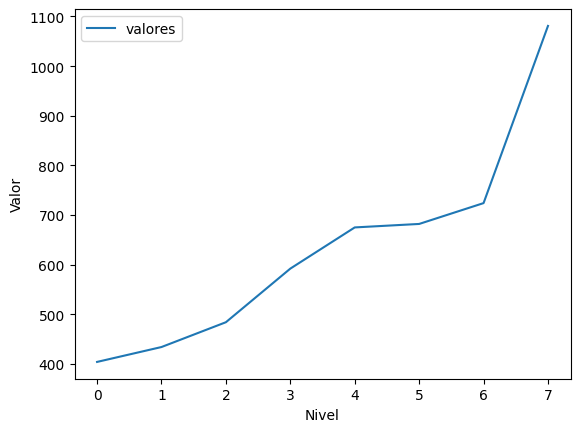

In [212]:
import matplotlib.pyplot as plt

plt.plot(df[1], label='valores')

plt.xlabel('Nivel')
plt.ylabel('Valor')
plt.legend()

plt.show()

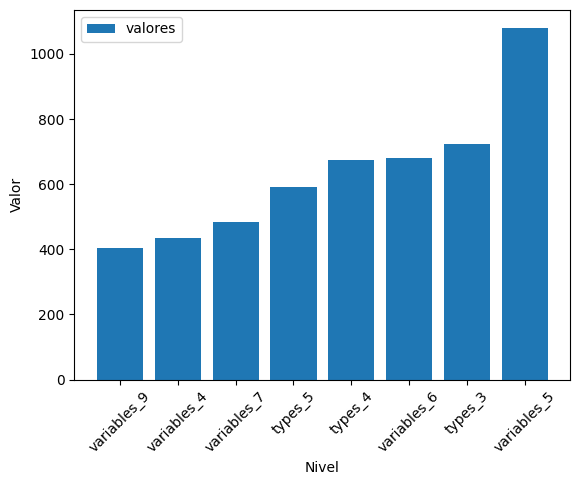

In [213]:
import matplotlib.pyplot as plt

plt.bar(df[0], df[1], label='valores')

plt.xlabel('Nivel')
plt.ylabel('Valor')
plt.legend()

plt.xticks(rotation=45)

plt.show()

In [214]:
df2 = pd.DataFrame(nivelesCreadas)
df1 = pd.DataFrame(valoresCreadas)

correlation = df.corrwith(df2)

print(correlation)

1    0.918703
dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_20016\3337370289.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corrwith(df2)


In [215]:
import xml.etree.ElementTree as ET
code = "\r\n<xml>\r\n    <variables />\r\n    <block type=\"start_start\" id=\"start_start_vw37\" x=\"199\" y=\"-207\">\r\n        <next>\r\n            <block type=\"movement_move_laser\" id=\"movement_move_laser_r23d\">\r\n                <field name=\"DIRECTION\">UP</field>\r\n                <value name=\"AMOUNT\">\r\n                    <block type=\"math_number\" id=\"math_number_x823\">\r\n                        <field name=\"NUM\">1</field>\r\n                    </block>\r\n                </value>\r\n            </block>\r\n        </next>\r\n    </block>\r\n</xml>"

parsed = ET.fromstring(code)
#parsed.tag
#parsed.attrib

for child in parsed.iter():
    print(child.tag, child.attrib)

xml {}
variables {}
block {'type': 'start_start', 'id': 'start_start_vw37', 'x': '199', 'y': '-207'}
next {}
block {'type': 'movement_move_laser', 'id': 'movement_move_laser_r23d'}
field {'name': 'DIRECTION'}
value {'name': 'AMOUNT'}
block {'type': 'math_number', 'id': 'math_number_x823'}
field {'name': 'NUM'}
